In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [32]:
BASE_PATH = '../data/'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
TRAIN_PATH = BASE_PATH + TRAIN_FILE
TEST_PATH = BASE_PATH + TEST_FILE


In [33]:
train = pd.read_csv(TRAIN_PATH, parse_dates=['Dates'])

In [34]:
test = pd.read_csv(TEST_PATH, parse_dates=['Dates'], index_col='Id')

In [35]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [36]:
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       884262 non-null  datetime64[ns]
 1   DayOfWeek   884262 non-null  object        
 2   PdDistrict  884262 non-null  object        
 3   Address     884262 non-null  object        
 4   X           884262 non-null  float64       
 5   Y           884262 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 47.2+ MB


In [39]:
# drop the duplicated records
train.drop_duplicates(inplace=True)
# drop the columns in training set that are not given in test set
train.drop(["Descript", "DayOfWeek", "Resolution"], axis=1, inplace=True)
# drop the redundant columns in testing set
test.drop(["DayOfWeek"], axis=1, inplace=True)

In [40]:
train.head()

,Dates,Category,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       875726 non-null  datetime64[ns]
 1   Category    875726 non-null  object        
 2   PdDistrict  875726 non-null  object        
 3   Address     875726 non-null  object        
 4   X           875726 non-null  float64       
 5   Y           875726 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 46.8+ MB


### Gaining some insights from the data

#### Crime Category

In [42]:
num_of_cat = train['Category'].nunique()
print(f'number of crime category: {num_of_cat}')

number of crime category: 39


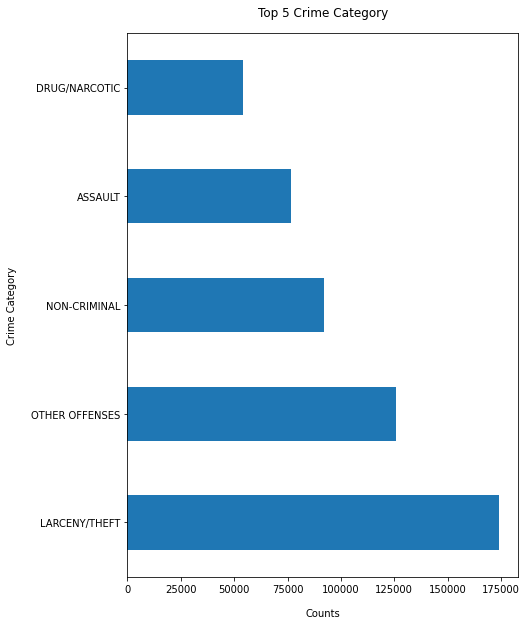

In [43]:
train['Category'].value_counts().nlargest(5).plot(kind='barh', figsize=(7, 10), fontsize=10)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Crime Category", labelpad=14)
plt.title("Top 5 Crime Category", y=1.02);

<AxesSubplot:xlabel='X', ylabel='Y'>

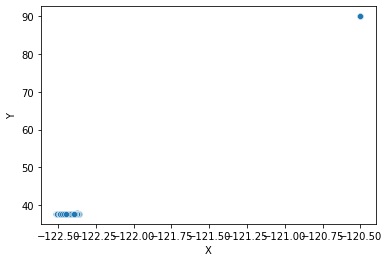

In [44]:
sns.scatterplot(data=train, x="X", y="Y")

## Data Pre-processing

In [45]:
import sys
from os.path import abspath, join, dirname
sys.path.insert(0, join(abspath(dirname('../')), 'libs'))
import preprocessing as pp
import imp

imp.reload(pp)

<module 'preprocessing' from 'V:\\Cityu\\EE4146\\ee4146-group-project-main\\ee4146-group-project\\libs\\preprocessing.py'>

### One hot encoding to the categorical variable (PdDistrict)
#### For both train and test set

In [46]:
train = pp.one_hot_encode(train, ['PdDistrict'])
test = pp.one_hot_encode(test, ['PdDistrict'])

In [47]:
>>> train

,Dates,Category,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-05-13 23:53:00,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2015-05-13 23:33:00,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2015-05-13 23:30:00,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-13 23:30:00,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878045,2003-01-06 00:01:00,LARCENY/THEFT,600 Block of EDNA ST,-122.447364,37.731948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878046,2003-01-06 00:01:00,LARCENY/THEFT,5TH ST / FOLSOM ST,-122.403390,37.780266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878047,2003-01-06 00:01:00,VANDALISM,TOWNSEND ST / 2ND ST,-122.390531,37.780607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
test.head()

,Dates,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-10 23:59:00,2000 Block of THOMAS AV,-122.399588,37.735051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-05-10 23:51:00,3RD ST / REVERE AV,-122.391523,37.732432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-05-10 23:50:00,2000 Block of GOUGH ST,-122.426002,37.792212,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2015-05-10 23:45:00,4700 Block of MISSION ST,-122.437394,37.721412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-10 23:45:00,4700 Block of MISSION ST,-122.437394,37.721412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Address feature extraction (by https://scottmduda.medium.com/san-francisco-crime-classification-9d5a1c4d7cfd)
The address column only contains two types
* Intersection — OAK ST / LAGUNA ST
* Block — 100 Block of BRODERICK ST

In [19]:
train = pp.process_address(train)
test = pp.process_address(test)
train.head()

,Dates,Category,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-05-13 23:53:00,OTHER OFFENSES,0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2015-05-13 23:33:00,OTHER OFFENSES,0,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2015-05-13 23:30:00,LARCENY/THEFT,1,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-13 23:30:00,LARCENY/THEFT,1,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Date features extraction
* HourOfDay
* MinuteOfHour
* DayOfWeek (Weekend, Weekday)
* DayOfMonth
* Year
* MonthOfYear 
* QuarterOfYear (season)
* DayPart (dawn, morning, noon, afternoon, evening, midnight)

In [20]:
train = pp.process_data_time(train)
test = pp.process_data_time(test)
train.head()

,Category,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,...,QuarterOfYear_2.0,QuarterOfYear_3.0,QuarterOfYear_4.0,QuarterOfYear_nan,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,WARRANTS,0.0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,OTHER OFFENSES,0.0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,OTHER OFFENSES,0.0,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,LARCENY/THEFT,1.0,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,LARCENY/THEFT,1.0,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Label encoding to the predictor

In [21]:
train, mappings = pp.label_encode(train, ['Category'])
test, _ = pp.label_encode(train, ['Category'])

In [22]:
train.head()

,Category,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,...,QuarterOfYear_2.0,QuarterOfYear_3.0,QuarterOfYear_4.0,QuarterOfYear_nan,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,37,0.0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21,0.0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,0.0,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,1.0,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16,1.0,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
print(len(train.index))

878049


In [24]:
train.head()

,Category,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,...,QuarterOfYear_2.0,QuarterOfYear_3.0,QuarterOfYear_4.0,QuarterOfYear_nan,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,37,0.0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21,0.0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,0.0,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,1.0,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16,1.0,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
train.columns

Index(['Category', 'Address', 'X', 'Y', 'PdDistrict_BAYVIEW',
       'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION',
       'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND',
       'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN',
       'HourOfDay', 'MinuteOfHour', 'DayOfMonth', 'Year', 'DayOfWeek_weekDay',
       'DayOfWeek_weekend', 'MonthOfYear_autumn', 'MonthOfYear_spring',
       'MonthOfYear_summer', 'MonthOfYear_winter', 'QuarterOfYear_1.0',
       'QuarterOfYear_2.0', 'QuarterOfYear_3.0', 'QuarterOfYear_4.0',
       'QuarterOfYear_nan', 'DayPart_afternoon', 'DayPart_dawn',
       'DayPart_evening', 'DayPart_midnight', 'DayPart_morning',
       'DayPart_noon'],
      dtype='object')

In [26]:
test.columns

Index(['Category', 'Address', 'X', 'Y', 'PdDistrict_BAYVIEW',
       'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION',
       'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND',
       'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN',
       'HourOfDay', 'MinuteOfHour', 'DayOfMonth', 'Year', 'DayOfWeek_weekDay',
       'DayOfWeek_weekend', 'MonthOfYear_autumn', 'MonthOfYear_spring',
       'MonthOfYear_summer', 'MonthOfYear_winter', 'QuarterOfYear_1.0',
       'QuarterOfYear_2.0', 'QuarterOfYear_3.0', 'QuarterOfYear_4.0',
       'QuarterOfYear_nan', 'DayPart_afternoon', 'DayPart_dawn',
       'DayPart_evening', 'DayPart_midnight', 'DayPart_morning',
       'DayPart_noon'],
      dtype='object')

In [27]:
TRAIN_FILE_PRCOESSED = 'train_processed.pkl'
TEST_FILE_PRCOESSED = 'test_processed.pkl'

train.to_pickle(BASE_PATH + TRAIN_FILE_PRCOESSED)
test.to_pickle(BASE_PATH + TEST_FILE_PRCOESSED)